In [2]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import csv

IMPORT CSV

In [4]:
#load assesment file
MSFT = "resources/HistoricalData_MSFT.csv"
MSFT_df = pd.read_csv(MSFT)
MSFT_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,$250.78,21411550,$247.785,$251.16,$247.51
1,05/21/2021,$245.17,21863060,$247.565,$248.33,$244.74
2,05/20/2021,$246.48,21800720,$243.96,$247.95,$243.86
3,05/19/2021,$243.12,25739810,$239.31,$243.23,$238.6
4,05/18/2021,$243.08,20167980,$246.27,$246.41,$242.9


CLEAN, RESHAPE AND CONVERT DATATYPE

In [5]:
MSFT_df['Date']= pd.to_datetime(MSFT_df['Date'])
MSFT_df['Close/Last'] = MSFT_df['Close/Last'].str.replace('$','')
MSFT_df['Open'] = MSFT_df['Open'].str.replace('$','')
MSFT_df['High'] = MSFT_df['High'].str.replace('$','')
MSFT_df['Low'] = MSFT_df['Low'].str.replace('$','')
MSFT_df = MSFT_df.apply( pd.to_numeric)

<ipython-input-5-0b2a3a0df47d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  MSFT_df['Close/Last'] = MSFT_df['Close/Last'].str.replace('$','')
<ipython-input-5-0b2a3a0df47d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  MSFT_df['Open'] = MSFT_df['Open'].str.replace('$','')
<ipython-input-5-0b2a3a0df47d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  MSFT_df['High'] = MSFT_df['High'].str.replace('$','')
<ipython-input-5-0b2a3a0df47d>:5: FutureWarning: The default value of regex will change from True to False in a fut

FORMAT DATE COLUMN

In [6]:
MSFT_df['Date']= pd.to_datetime(MSFT_df['Date'])
MSFT_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,250.78,21411550,247.785,251.16,247.51
1,2021-05-21,245.17,21863060,247.565,248.33,244.74
2,2021-05-20,246.48,21800720,243.960,247.95,243.86
3,2021-05-19,243.12,25739810,239.310,243.23,238.60
4,2021-05-18,243.08,20167980,246.270,246.41,242.90


SPLIT DATAFRAME

In [7]:
#setup datetime for first 4 years
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = MSFT_df["Date"] >= start_date
before_end_date = MSFT_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
MSFT_df_4 = MSFT_df.loc[between_two_dates]
MSFT_df_4.head()

,Date,Close/Last,Volume,Open,High,Low
252,2020-05-22,183.51,20826900,183.19,184.46,182.54
253,2020-05-21,183.43,29119510,185.40,186.67,183.29
254,2020-05-20,185.66,31261330,184.81,185.85,183.94
255,2020-05-19,183.63,26799120,185.03,186.60,183.49
256,2020-05-18,184.91,35306620,185.75,186.20,183.96


SPLIT DATAFRAME

In [8]:
#setup datetime for last year
start_date = "2020-05-25"
end_date = "2021-05-24"

after_start_date = MSFT_df["Date"] >= start_date
before_end_date = MSFT_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
MSFT_df_ls = MSFT_df.loc[between_two_dates]
MSFT_df_ls.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,250.78,21411550,247.785,251.16,247.51
1,2021-05-21,245.17,21863060,247.565,248.33,244.74
2,2021-05-20,246.48,21800720,243.960,247.95,243.86
3,2021-05-19,243.12,25739810,239.310,243.23,238.60
4,2021-05-18,243.08,20167980,246.270,246.41,242.90


PLOT FIRST DF (4YEARS)

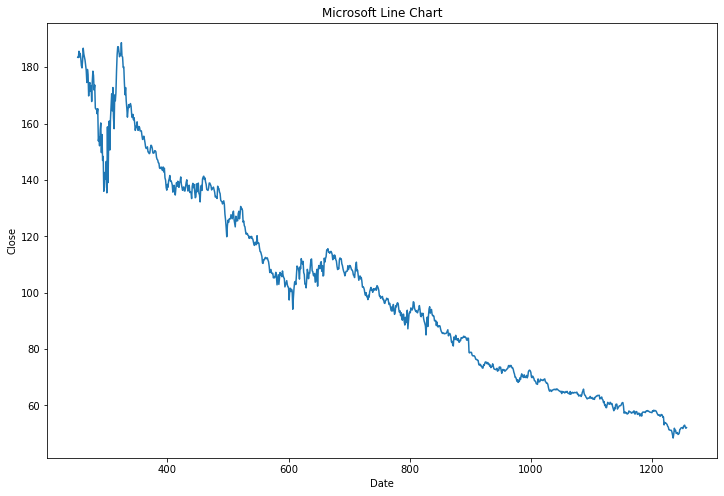

In [10]:
plt.figure(figsize=(12,8))
plt.plot(MSFT_df_4['Close/Last'])
plt.title("Microsoft Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

PLOT SECOND DF (LAST YEAR)

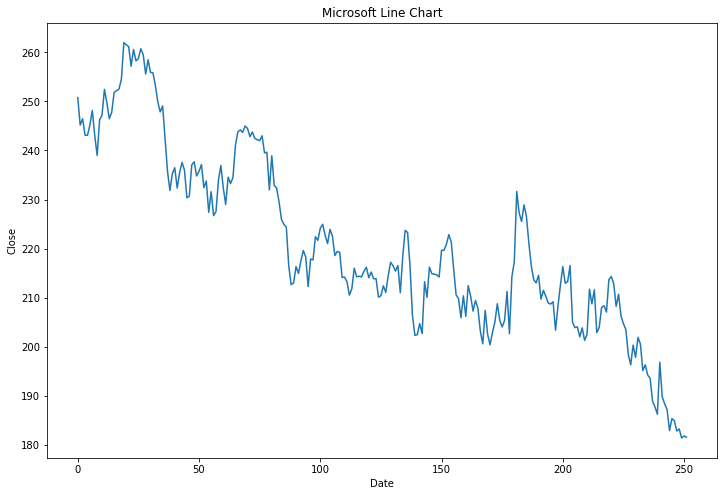

In [11]:
plt.figure(figsize=(12,8))
plt.plot(MSFT_df_ls['Close/Last'])
plt.title("Microsoft Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

SHAPPING, FITTING, TRAINING, TESTING ML ON 1ST DF

In [13]:
MSFT_df_4.shape

(1006, 6)

In [14]:
X = np.array(MSFT_df_4['Open']).reshape(1006,-1)
Y = np.array(MSFT_df_4['Close/Last']).reshape(1006,-1)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X, Y)

LinearRegression()

In [18]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.10501476]
coefficient count: 1


In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy:', lr.score(X, Y))

Accuracy: 0.9981148446674122


In [20]:
# Predicting the price
lr.predict(X)

array([[183.1404069 ],
       [185.34854171],
       [184.75903966],
       ...,
       [ 51.98119556],
       [ 51.99118712],
       [ 51.98119556]])

Text(0.5, 1.0, '4 Years CLosing Price vs Predicted Closing Price')

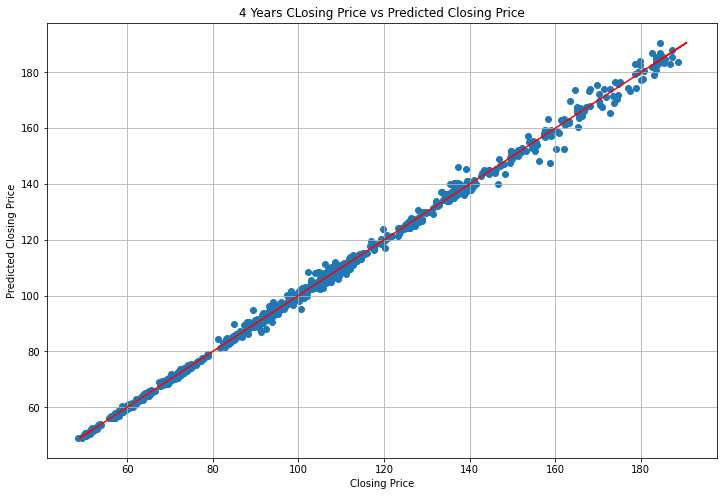

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(MSFT_df_4['Close/Last'], lr.predict(X))
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/MSFT_4y.jpg', dpi=40)
plt.grid()
plt.title('4 Years CLosing Price vs Predicted Closing Price')

TRAINING, TESTING ML ON 2ND DF

In [23]:
MSFT_df_ls.shape

(252, 6)

In [24]:
X_ls = np.array(MSFT_df_ls['Open']).reshape(252,-1)
Y_ls = np.array(MSFT_df_ls['Close/Last']).reshape(252,-1)

In [25]:
lr.fit(X_ls, Y_ls)

LinearRegression()

In [26]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [2.60505635]
coefficient count: 1


In [27]:
print('Accuracy:', lr.score(X_ls, Y_ls))

Accuracy: 0.9756617015917212


In [28]:
# Predicting the price
lr.predict(X_ls)

array([[247.62035123],
       [247.40281036],
       [243.83810653],
       [239.24008356],
       [246.12228568],
       [246.39915588],
       [245.43505429],
       [241.7022507 ],
       [242.06317078],
       [244.4215116 ],
       [250.67086754],
       [251.93655989],
       [246.30027367],
       [248.88109946],
       [250.76974976],
       [253.17258757],
       [249.55349852],
       [255.20956118],
       [255.82065327],
       [261.26609681],
       [261.34025848],
       [257.60251077],
       [259.90646637],
       [258.65066224],
       [257.54318144],
       [259.88668992],
       [259.17473798],
       [257.6529407 ],
       [257.2020378 ],
       [256.98647458],
       [254.46794458],
       [252.64851183],
       [252.54962962],
       [247.64507178],
       [247.44730736],
       [242.65151996],
       [238.40947296],
       [232.91162184],
       [233.51974746],
       [236.55048733],
       [231.56682373],
       [235.27490677],
       [237.79145912],
       [237

Text(0.5, 1.0, '1 Year CLosing Price vs Predicted Closing Price')

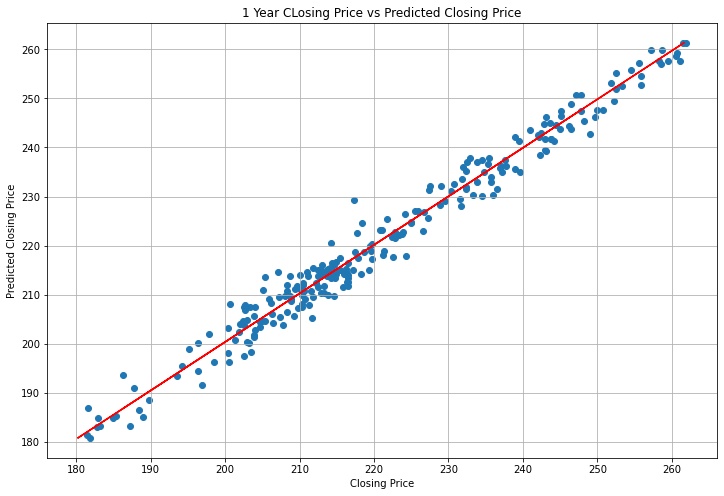

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(MSFT_df_ls['Close/Last'], lr.predict(X_ls))
plt.plot(X_ls, lr.predict(X_ls), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/MSFT_ls.jpg', dpi=40)
plt.grid()
plt.title('1 Year CLosing Price vs Predicted Closing Price')